# 📌 Transaction Analysis for Fraud Detection

## 🔍 Overview
This dataset is designed for building and evaluating fraud detection models using machine learning techniques. It contains realistic **synthetic** transaction data with **21 features**, including numerical, categorical, and temporal attributes. The dataset is particularly well-suited for **binary classification** tasks using models such as **XGBoost** and **LightGBM**.

## 🏷️ Dataset Features
The dataset includes the following columns:

| Column Name                      | Description |
|-----------------------------------|-------------|
| `Transaction_ID`                  | Unique identifier for each transaction |
| `User_ID`                          | Unique identifier for the user |
| `Transaction_Amount`               | Amount of money involved in the transaction |
| `Transaction_Type`                 | Type of transaction (e.g., Online, In-Store, ATM) |
| `Timestamp`                        | Date and time of the transaction |
| `Account_Balance`                  | User's account balance before the transaction |
| `Device_Type`                      | Type of device used (e.g., Mobile, Desktop) |
| `Location`                         | Geographical location of the transaction |
| `Merchant_Category`                | Type of merchant (Retail, Food, Travel, etc.) |
| `IP_Address_Flag`                  | Whether the IP address was flagged as suspicious (0 = No, 1 = Yes) |
| `Previous_Fraudulent_Activity`     | Number of past fraudulent activities by the user |
| `Daily_Transaction_Count`          | Number of transactions made by the user that day |
| `Avg_Transaction_Amount_7d`        | User's average transaction amount in the past 7 days |
| `Failed_Transaction_Count_7d`      | Count of failed transactions in the past 7 days |
| `Card_Type`                        | Type of payment card used (Credit, Debit, Prepaid, etc.) |
| `Card_Age`                         | Age of the card in months |
| `Transaction_Distance`             | Distance between the user's usual location and transaction location |
| `Authentication_Method`            | How the user authenticated (PIN, Biometric, etc.) |
| `Risk_Score`                       | Fraud risk score computed for the transaction |
| `Is_Weekend`                       | Whether the transaction occurred on a weekend (0 = No, 1 = Yes) |
| `Fraud_Label`                      | Target variable (0 = Not Fraud, 1 = Fraud) |

## 📊 Potential Use Cases
✅ **Fraud detection model training** – Build machine learning models to classify fraudulent transactions.  
✅ **Anomaly detection in financial transactions** – Identify unusual transaction patterns.  
✅ **Risk scoring systems** – Enhance fraud prevention for banks and fintech companies.  
✅ **Feature engineering research** – Experiment with new features for better fraud detection models.  
✅ **Model explainability studies** – Investigate how different features contribute to fraud prediction.  


[dataset](https://www.kaggle.com/datasets/samayashar/fraud-detection-transactions-dataset)

In [72]:
#!/bin/bash

!cd ..
!mkdir -p data

!curl -L -o data/fraud-detection-transactions-dataset.zip \
  https://www.kaggle.com/api/v1/datasets/download/samayashar/fraud-detection-transactions-dataset

!unzip -o data/fraud-detection-transactions-dataset.zip -d data

!rm data/fraud-detection-transactions-dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2055k  100 2055k    0     0  1296k      0  0:00:01  0:00:01 --:--:-- 4735k
Archive:  data/fraud-detection-transactions-dataset.zip
  inflating: data/synthetic_fraud_dataset.csv  


In [73]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-pastel')
sns.set_theme(style='whitegrid')
sns.set_style('darkgrid') 
pd.set_option('display.max_columns', None)


In [74]:
PATH = 'data/synthetic_fraud_dataset.csv'

In [75]:
df = pd.read_csv(PATH)

print(f'\nDataset size: {df.shape}\n')
df.head()


Dataset size: (50000, 21)



,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,50000.0,99.411012,98.687292,0.0000,28.6775,69.66000,138.852500,1174.14
Account_Balance,50000.0,50294.065981,28760.458557,500.4800,25355.9950,50384.43000,75115.135000,99998.31
IP_Address_Flag,50000.0,0.050200,0.218360,0.0000,0.0000,0.00000,0.000000,1.00
Previous_Fraudulent_Activity,50000.0,0.098400,0.297858,0.0000,0.0000,0.00000,0.000000,1.00
Daily_Transaction_Count,50000.0,7.485240,4.039637,1.0000,4.0000,7.00000,11.000000,14.00
Avg_Transaction_Amount_7d,50000.0,255.271924,141.382279,10.0000,132.0875,256.08500,378.032500,500.00
Failed_Transaction_Count_7d,50000.0,2.003540,1.414273,0.0000,1.0000,2.00000,3.000000,4.00
Card_Age,50000.0,119.999940,68.985817,1.0000,60.0000,120.00000,180.000000,239.00
Transaction_Distance,50000.0,2499.164155,1442.013834,0.2500,1256.4975,2490.78500,3746.395000,4999.93
Risk_Score,50000.0,0.501556,0.287774,0.0001,0.2540,0.50225,0.749525,1.00


In [78]:
df.describe(include='object').T

,count,unique,top,freq
Transaction_ID,50000,50000,TXN_33553,1
User_ID,50000,8963,USER_6599,16
Transaction_Type,50000,4,POS,12549
Timestamp,50000,47724,2023-06-04 06:35:00,4
Device_Type,50000,3,Tablet,16779
Location,50000,5,Tokyo,10208
Merchant_Category,50000,5,Clothing,10033
Card_Type,50000,4,Mastercard,12693
Authentication_Method,50000,4,Biometric,12591


In [79]:
df.isnull().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

## Start EDA

In [80]:
df = df.drop(['Transaction_ID', 'User_ID'], axis=1)

print(f'\n Dataframe new shape: {df.shape}\n')


 Dataframe new shape: (50000, 19)



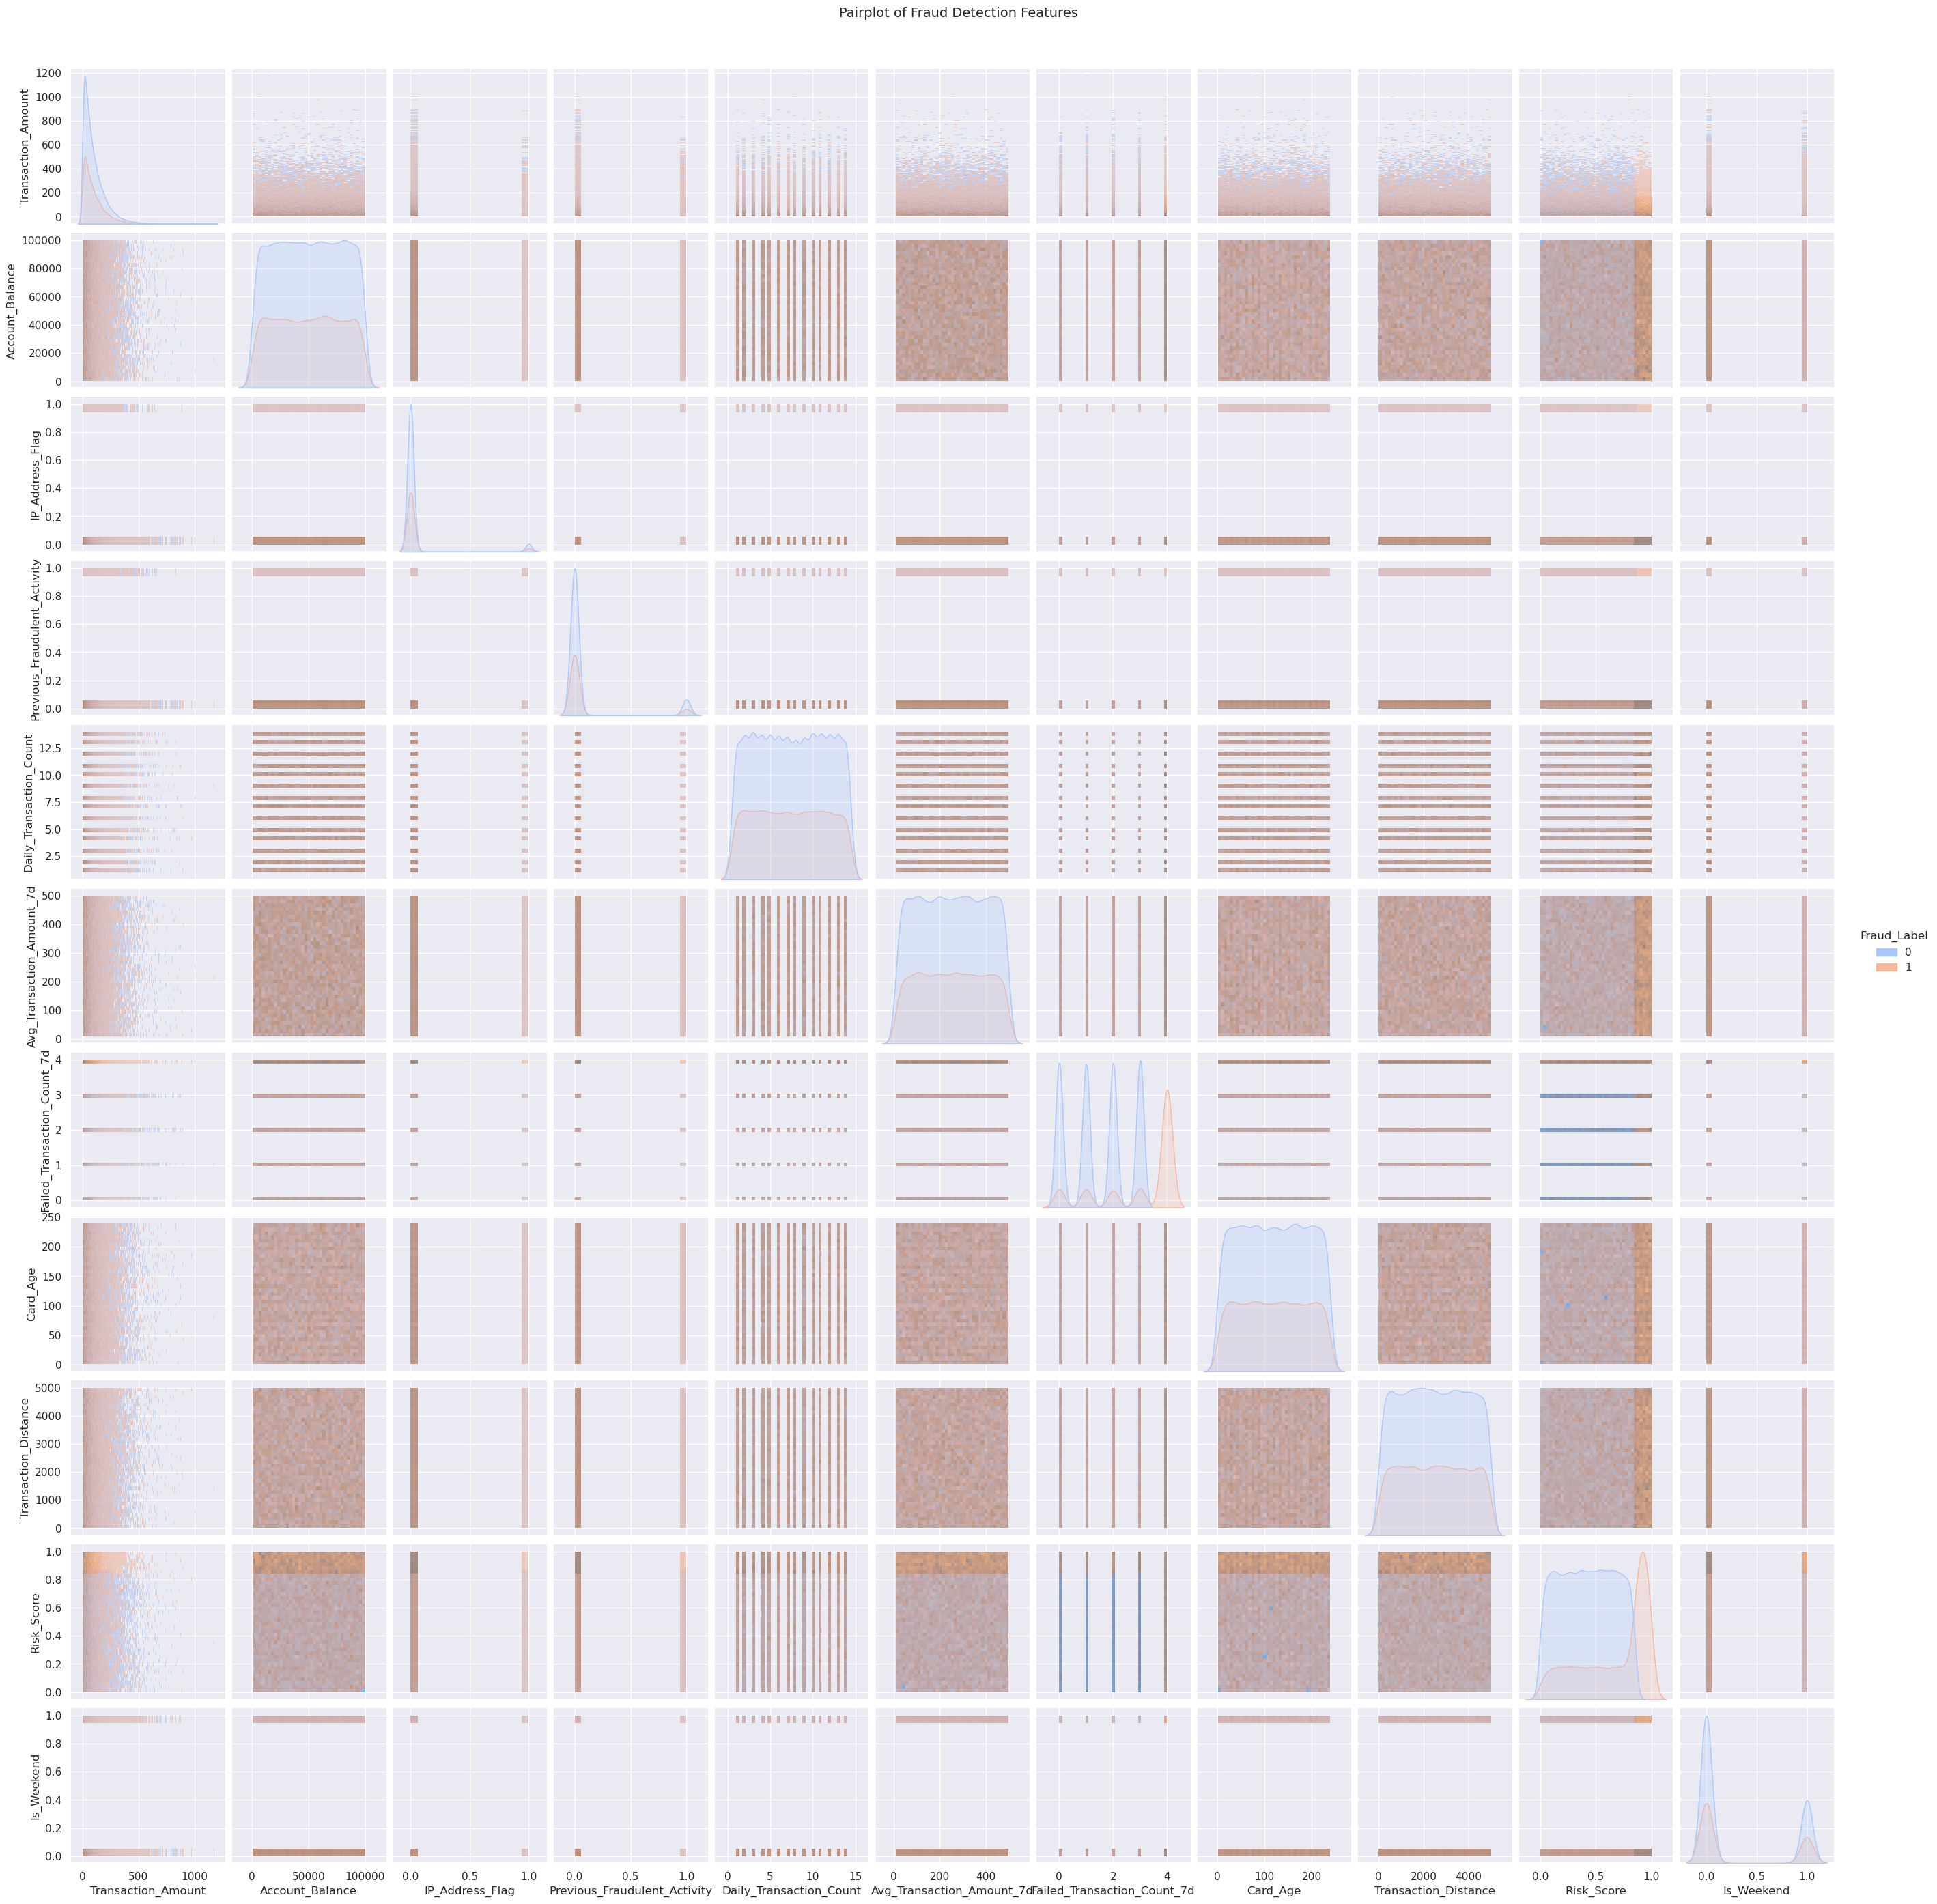

In [81]:
sns.pairplot(
    data=df, 
    kind="hist", 
    diag_kind="kde", 
    hue="Fraud_Label", 
    palette="coolwarm", 
    markers=["o", "s"], 
    plot_kws={'alpha': 0.6}, 
    diag_kws={'shade': True}, 
    height=2.5  
)

plt.suptitle("Pairplot of Fraud Detection Features", fontsize=14, y=1.02)
plt.show()

In [82]:
target_counts = df['Fraud_Label'].value_counts()

fig = px.pie(data_frame=target_counts,
       values=target_counts.values,
       names=target_counts.index,
       title="Distribution of Fraud vs. Non-Fraud Transactions",
       color_discrete_sequence=px.colors.qualitative.Pastel1
       )

fig.update_traces(
    textinfo="percent+label", 
    pull=[0.05, 0],  
    marker=dict(line=dict(color="#000000", width=1)),
)

fig.update_layout(
    title_font_size=18,
    font=dict(size=14),
    showlegend=True,
)


fig.show(renderrer='iframe_connected')

In [84]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [85]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day_Of_Week'] = df['Timestamp'].dt.dayofweek

df['Day_Of_Week'] = df['Day_Of_Week'].apply(lambda x: 'weekend' if x >= 5 else 'working_day')

In [86]:
bins = [-1, 3, 6, 10, 16, 19, 23]
labels = ['night', 'early morning', 'morning', 'afternoon', 'early evening', 'evening']

df['Day_Time'] = pd.cut(df['Timestamp'].dt.hour, bins=bins, labels=labels, include_lowest=True)
df

,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Year,Month,Day_Of_Week,Day_Time
0,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0,2023,8,working_day,early evening
1,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1,2023,6,working_day,early morning
2,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1,2023,6,working_day,afternoon
3,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1,2023,12,working_day,night
4,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1,2023,11,weekend,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,Online,2023-01-29 18:38:00,76960.11,Mobile,Tokyo,Clothing,0,0,2,389.00,3,Amex,98,1537.54,PIN,0.1493,1,0,2023,1,weekend,early evening
49996,126.15,POS,2023-05-09 08:55:00,28791.75,Mobile,Tokyo,Clothing,0,0,13,434.95,4,Visa,93,2555.72,Biometric,0.3653,0,1,2023,5,working_day,morning
49997,72.02,Online,2023-01-30 19:32:00,29916.41,Laptop,Mumbai,Clothing,0,1,1,369.15,2,Visa,114,4686.59,Biometric,0.5195,0,0,2023,1,working_day,early evening
49998,64.89,Bank Transfer,2023-03-09 19:47:00,67895.67,Mobile,Tokyo,Electronics,0,0,13,242.29,4,Discover,72,4886.92,Biometric,0.7063,0,1,2023,3,working_day,early evening


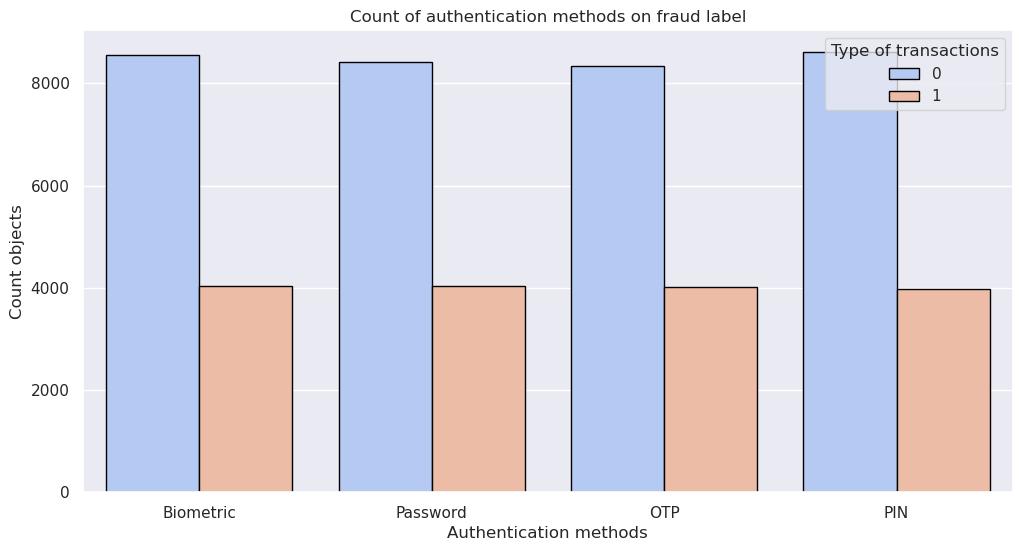

In [102]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, 
              x='Authentication_Method', 
              hue='Fraud_Label', 
              palette='coolwarm',
              edgecolor='black',
              )
plt.title('Count of authentication methods on fraud label')
plt.xlabel('Authentication methods', fontsize=12)
plt.ylabel('Count objects', fontsize=12)
plt.legend(title='Type of transactions');

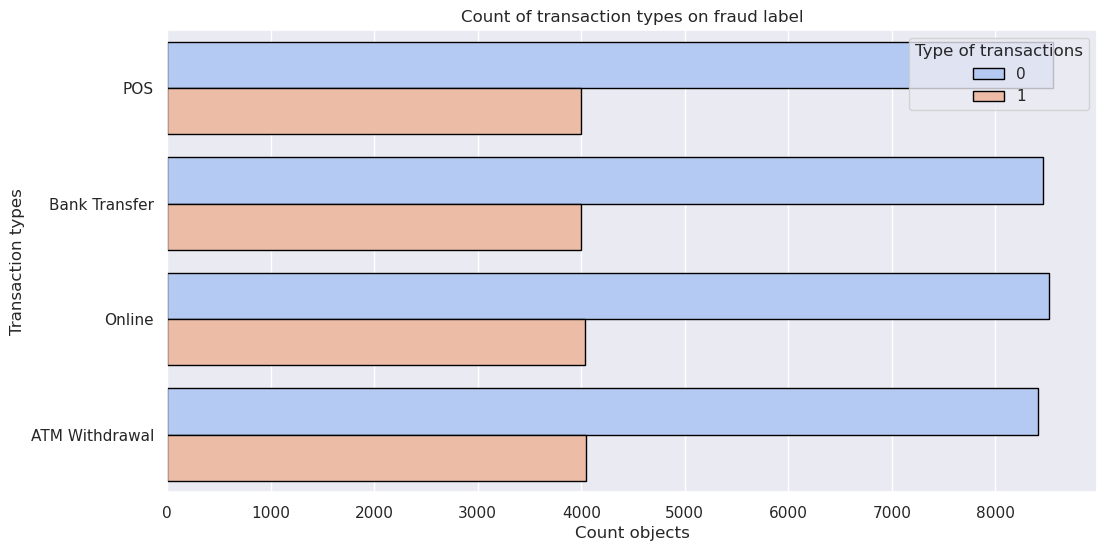

In [101]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, 
              y='Transaction_Type', 
              hue='Fraud_Label', 
              palette='coolwarm',
              edgecolor='black',
              )
plt.title('Count of transaction types on fraud label')
plt.xlabel('Count objects', fontsize=12)
plt.ylabel('Transaction types', fontsize=12)
plt.legend(title='Type of transactions');

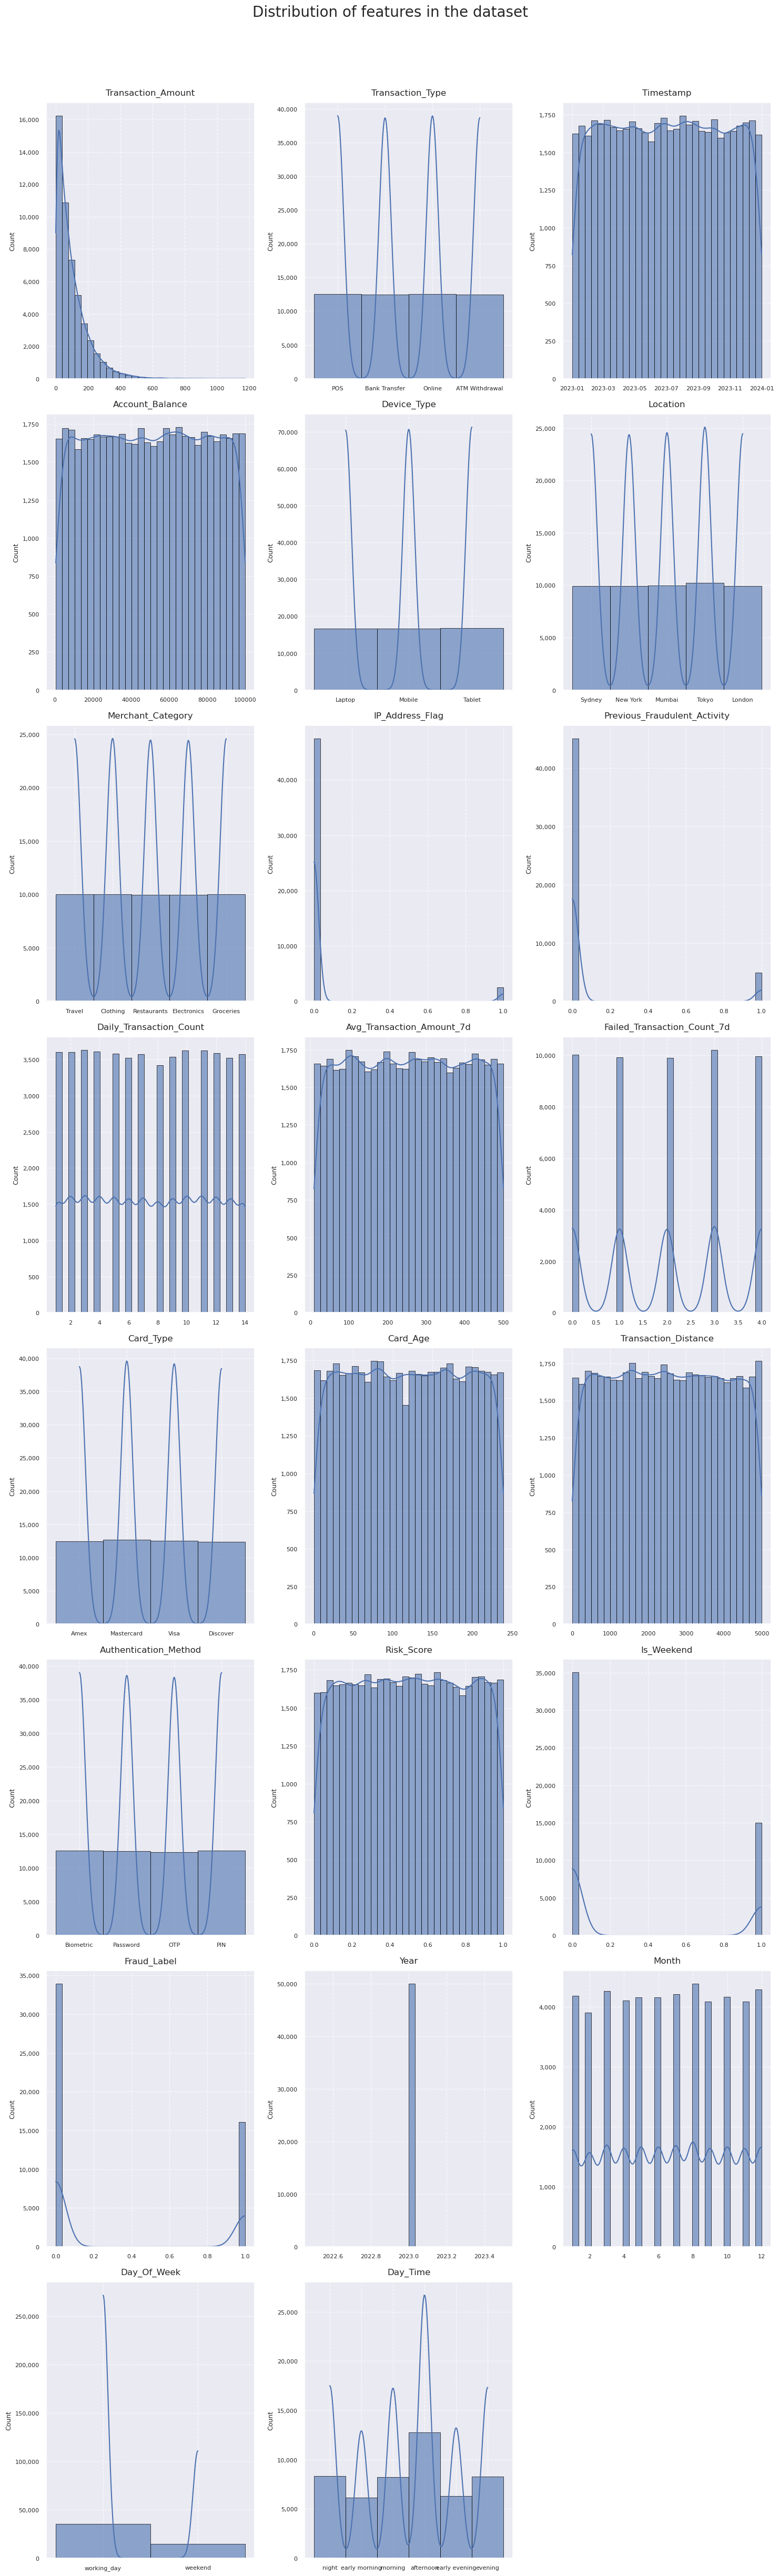

In [ ]:
n_cols = 3
n_features = len(df.columns)
n_rows = (n_features + n_cols - 1) // n_cols  

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 6*n_rows))
fig.suptitle('Distribution of features in the dataset', fontsize=20, y=1.02)

axes = axes.flatten()

for i, column in enumerate(df.columns):
    ax = axes[i]
    
    sns.histplot(df[column], 
                 ax=ax, 
                 kde=True, 
                 bins=30, 
                 alpha=0.6,
                 edgecolor='black',
                 linewidth=0.5,
                 )
    
    ax.set_title(f'{column}', fontsize=12, pad=10)
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=9)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    ax.get_yaxis().set_major_formatter(
        plt.FuncFormatter(lambda x, p: format(int(x), ','))
    )

for j in range(n_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [105]:
df.columns

Index(['Transaction_Amount', 'Transaction_Type', 'Timestamp',
       'Account_Balance', 'Device_Type', 'Location', 'Merchant_Category',
       'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend', 'Fraud_Label', 'Year', 'Month', 'Day_Of_Week',
       'Day_Time'],
      dtype='object')

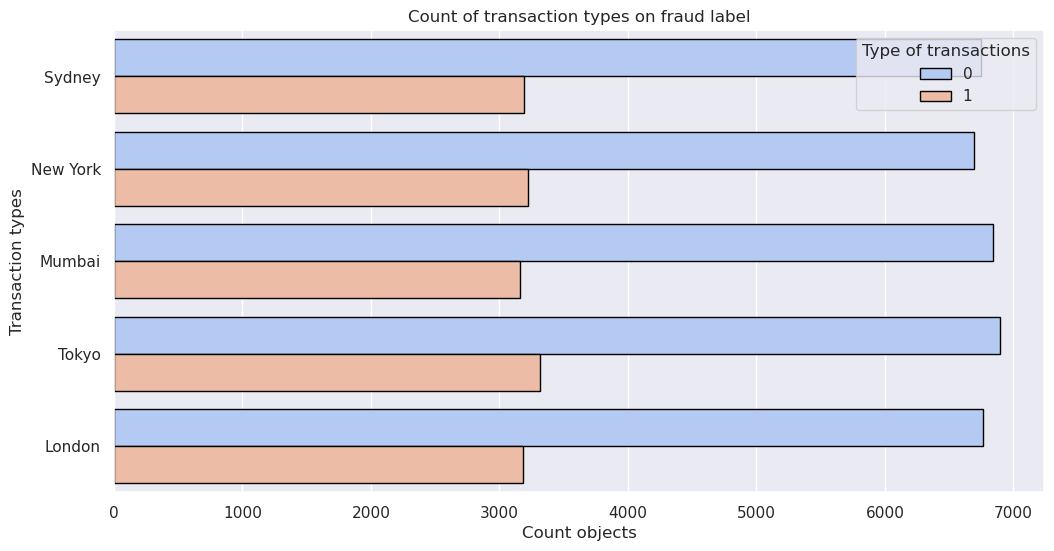

In [107]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, 
              y='Location', 
              hue='Fraud_Label', 
              palette='coolwarm',
              edgecolor='black',
              )
plt.title('Count of transaction types on fraud label')
plt.xlabel('Count objects', fontsize=12)
plt.ylabel('Transaction types', fontsize=12)
plt.legend(title='Type of transactions');